# 决策树回归 VS 线性回归

In [1]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression

from sklearn import datasets

from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
X,y = datasets.load_diabetes(return_X_y=True) # 糖尿病数据
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=911) # 数据划分时，随机性
model = LinearRegression()
model.fit(X_train,y_train)
# 上面得分更高，训练数据
# 数据量足够大，一定是上面得分更加高！
print('训练数据得分：',model.score(X_train,y_train))
print('测试数据得分：',model.score(X_test,y_test))

训练数据得分： 0.5400335111023531
测试数据得分： 0.41394334367679464


最高分数是： 0.2548914948984262


/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


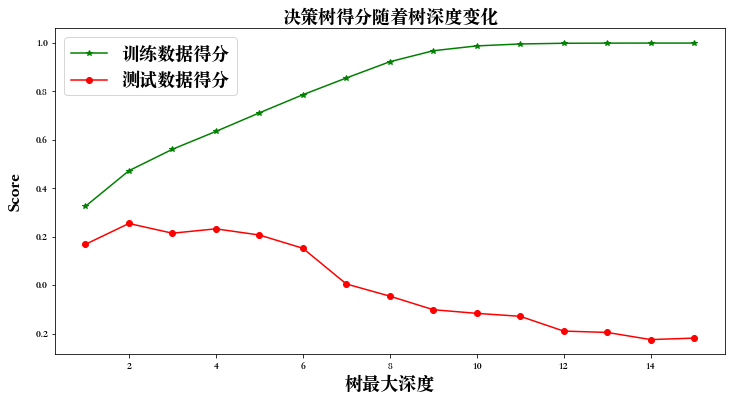

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Songti SC'
plt.figure(figsize=(12,6))
max_depth = np.arange(1,16)
score = []
score2 = []
for d in max_depth:
    model = DecisionTreeRegressor(max_depth=d)
    model.fit(X_train,y_train)
    score2.append(model.score(X_train,y_train)) # 决策树对训练数据得分
    s = model.score(X_test,y_test)
    score.append(s)

plt.plot(max_depth,score2,'g*-') # 绿色的线是训练数据随着树深度增加得分变化
plt.plot(max_depth,score,'ro-') # 红色的线是测试数据随着树深度增加得分变化
plt.xlabel('树最大深度',fontsize = 18)
plt.ylabel('Score',fontsize = 18)
plt.title('决策树得分随着树深度变化',fontsize =18)
plt.legend(['训练数据得分','测试数据得分'],fontsize = 18)
print('最高分数是：',max(score))

# 随机森林使用

In [4]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import datasets
# import graphviz

In [5]:
X,y = datasets.load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y)

## 一棵树

In [6]:
score = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    model = DecisionTreeClassifier()
    model.fit(X_train,y_train)
    score += model.score(X_test,y_test)/100
    
print('一颗决策树平均得分是：',score)

一颗决策树平均得分是： 0.9108888888888886


In [7]:
X_train.shape

(133, 13)

## 随机森林（多棵树）

In [8]:
score = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y)
    # 分类器 clf
    clf = RandomForestClassifier(n_estimators=100,max_depth=3) # 表示100棵树，组成了随机森林
    clf.fit(X_train,y_train)
    score += clf.score(X_test,y_test)/100
print('随机森林平均得分是：',score)

随机森林平均得分是： 0.979111111111111


## 两种算法比较（准确率）

In [9]:
model.predict_proba(X_test) # 一棵树，叶节点，落到哪个叶节点算作哪一类，概率：0,1

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [12]:
np.set_printoptions(suppress=1)
np.round(clf.predict_proba(X_test),2) # 概率0.91,0.07，100棵树，进行投票

array([[0.11, 0.64, 0.26],
       [0.89, 0.09, 0.02],
       [0.01, 0.98, 0.01],
       [0.89, 0.09, 0.02],
       [0.  , 0.87, 0.13],
       [0.02, 0.96, 0.01],
       [0.94, 0.05, 0.01],
       [0.41, 0.48, 0.12],
       [0.  , 0.01, 0.99],
       [0.  , 0.69, 0.31],
       [0.  , 0.03, 0.97],
       [0.  , 0.04, 0.96],
       [0.  , 0.03, 0.97],
       [0.81, 0.14, 0.06],
       [0.02, 0.95, 0.03],
       [0.9 , 0.06, 0.04],
       [0.85, 0.11, 0.03],
       [0.  , 0.02, 0.98],
       [0.02, 0.97, 0.01],
       [0.01, 0.13, 0.86],
       [0.95, 0.04, 0.01],
       [0.3 , 0.7 , 0.01],
       [0.02, 0.94, 0.04],
       [0.91, 0.07, 0.02],
       [0.03, 0.02, 0.95],
       [0.15, 0.82, 0.03],
       [0.04, 0.78, 0.18],
       [0.02, 0.98, 0.01],
       [0.92, 0.07, 0.  ],
       [0.12, 0.75, 0.13],
       [0.09, 0.9 , 0.01],
       [0.03, 0.95, 0.02],
       [0.95, 0.04, 0.  ],
       [0.5 , 0.45, 0.05],
       [0.95, 0.05, 0.  ],
       [0.9 , 0.08, 0.02],
       [0.94, 0.06, 0.01],
 

## 可视化

### 单一决策树结构

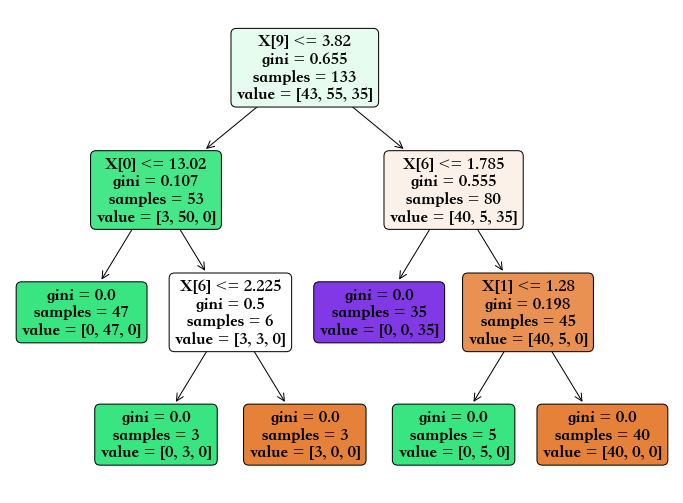

In [15]:
# # 单一决策树结构
# dot_data = tree.export_graphviz(model,filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model,filled=1,rounded=1)

### 随机森林100棵

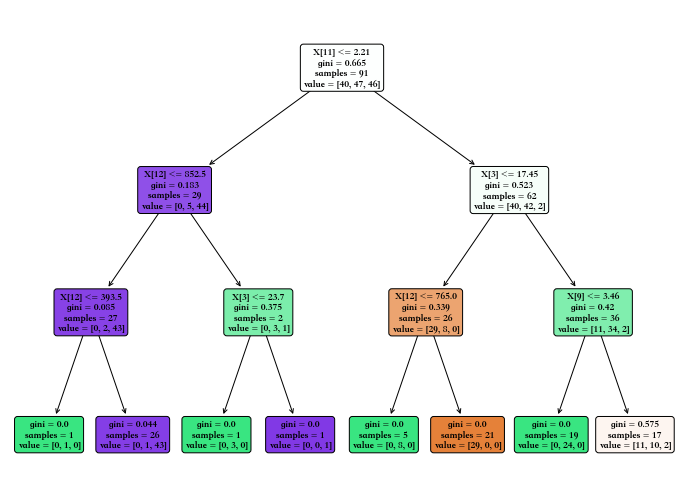

In [16]:
# 随机森林100棵
# 先画第一棵树
# dot_data = tree.export_graphviz(clf[0],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(clf[0],filled=1,rounded=1)

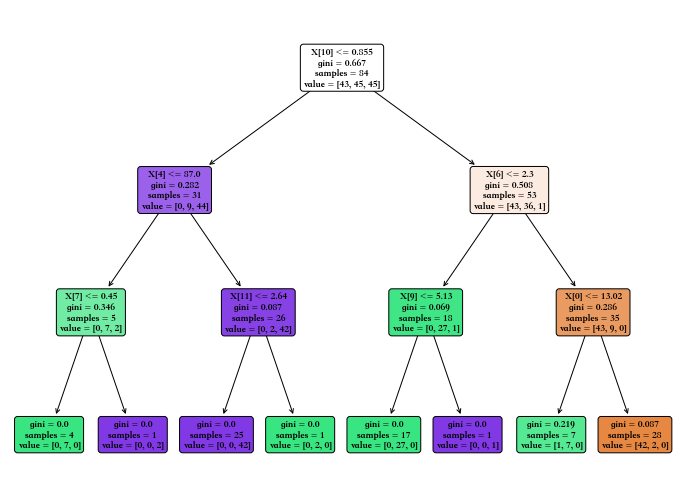

In [17]:
# 先画第五十棵树
# dot_data = tree.export_graphviz(clf[49],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(clf[49],filled=1,rounded=1)

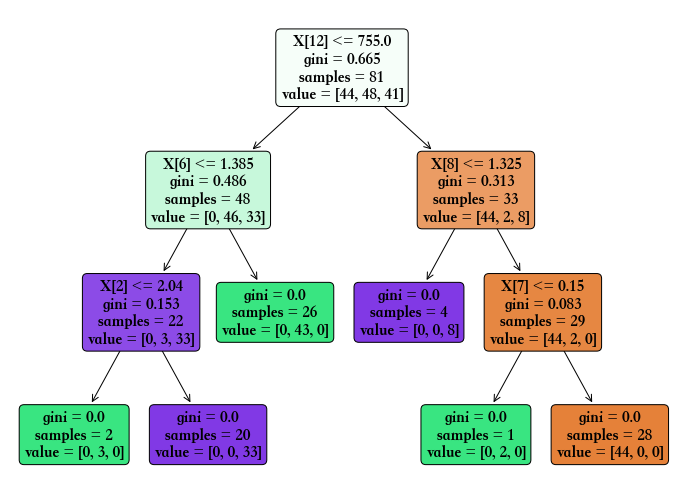

In [18]:
# # 画最后一棵树
# dot_data = tree.export_graphviz(clf[-1],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(clf[99],filled=1,rounded=1)

# 极限森林

In [19]:
# 依然使用上面的数据
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
score = 0
for i in range(100):
    X_train,X_test,y_train,y_test = train_test_split(X,y) # 葡萄酒的数据
    clf2 = ExtraTreesClassifier(max_depth = 3)
    clf2.fit(X_train,y_train)
    score += clf2.score(X_test,y_test)/100
print('极限森林平均得分是：',score)

极限森林平均得分是： 0.9784444444444443


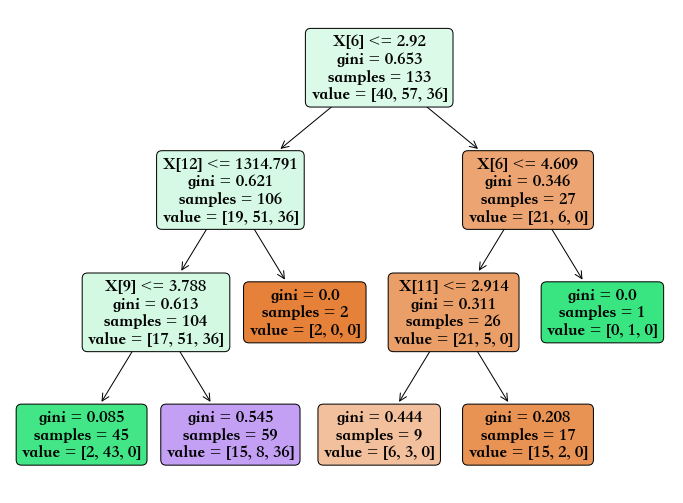

In [21]:
# 第一棵树
# dot_data = tree.export_graphviz(clf2[0],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(clf2[0],filled=1,rounded=1)

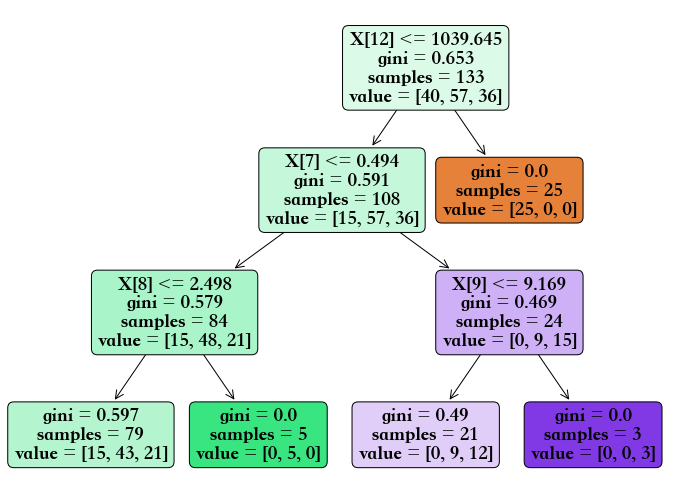

In [22]:
# 第50棵树
# dot_data = tree.export_graphviz(clf2[49],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(clf2[49],filled=1,rounded=1)

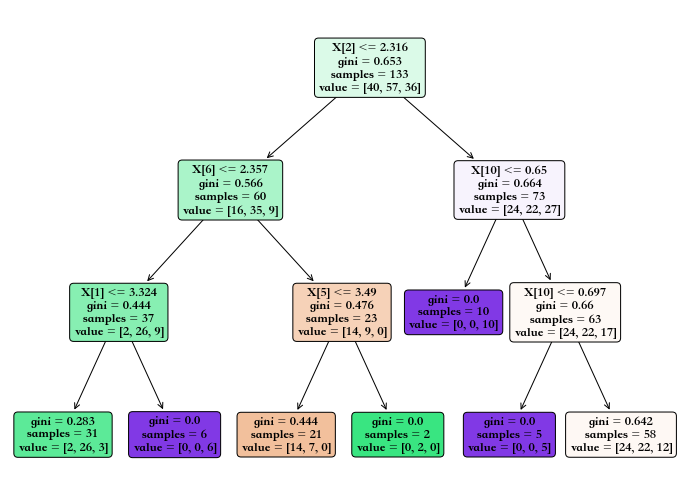

In [23]:
# 随机森林：随机抽样
# 极限森林：使用所有样本
# 第100棵树
# dot_data = tree.export_graphviz(clf2[-1],filled=True,rounded=True)
# graphviz.Source(dot_data)
plt.figure(figsize=(12,9))
_ = tree.plot_tree(clf2[-1],filled=1,rounded=1)

# 计算gini系数

In [24]:
clf2 = ExtraTreesClassifier()
X_train,X_test,y_train,y_test = train_test_split(X,y) # 葡萄酒的数据
clf2.fit(X_train,y_train)

ExtraTreesClassifier()

In [25]:
count = []
for i in range(3):
    count.append((y_train == i).sum())
count = np.array(count)
p = count / count.sum()
gini = (p * (1 - p)).sum()
print('未分裂，gini系数是：',round(gini,3))

未分裂，gini系数是： 0.659


In [26]:
y_train.shape

(133,)

In [27]:
f = np.sort(X_train[:,12])
gini_lower = 1
best_split = {}
for i in range(len(f) - 1):
    split = round(f[i:i + 2].mean(),3)
    cond = X_train[:,12] <= split
    part1 = y_train[cond]
    part2 = y_train[~cond]
    # 计算每一部分的gini系数
    count1 = []
    count2 = []
    for j in range(3):
        count1.append((part1 == j).sum())
        count2.append((part2 == j).sum())
    count1,count2 = np.array(count1),np.array(count2)
    p1 = count1 / count1.sum()
    p2 = count2 / count2.sum()
    gini1 = round((p1 * (1 - p1)).sum(),3)
    gini2 = round((p2 * (1 - p2)).sum(),3)
    # 计算整体的gini系数
    gini = round(gini1 * count1.sum()/(y_train.size) + gini2 * count2.sum()/(y_train.size),3)
    if gini <= gini_lower:
        gini_lower = gini
        best_split.clear()
        best_split[j] = split
#     print(split,gini1,gini2,gini,count1,count2)
print(best_split,gini_lower)

{2: 900.5} 0.415


In [28]:
f

array([ 278.,  290.,  315.,  342.,  345.,  345.,  352.,  355.,  378.,
        380.,  380.,  385.,  392.,  406.,  410.,  415.,  415.,  425.,
        428.,  428.,  434.,  438.,  450.,  450.,  450.,  463.,  465.,
        470.,  472.,  480.,  480.,  488.,  495.,  500.,  502.,  510.,
        510.,  515.,  515.,  520.,  520.,  520.,  530.,  550.,  550.,
        560.,  560.,  562.,  562.,  562.,  570.,  580.,  600.,  600.,
        607.,  620.,  625.,  630.,  630.,  630.,  640.,  650.,  660.,
        660.,  660.,  672.,  675.,  678.,  680.,  680.,  680.,  680.,
        685.,  695.,  695.,  718.,  725.,  740.,  750.,  750.,  750.,
        750.,  760.,  780.,  795.,  830.,  830.,  835.,  840.,  855.,
        870.,  880.,  885.,  886.,  915.,  920.,  937.,  970.,  985.,
        985.,  990., 1015., 1035., 1035., 1035., 1045., 1045., 1050.,
       1060., 1065., 1065., 1080., 1095., 1105., 1120., 1150., 1185.,
       1195., 1235., 1270., 1280., 1285., 1285., 1285., 1290., 1295.,
       1310., 1320.,

In [29]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

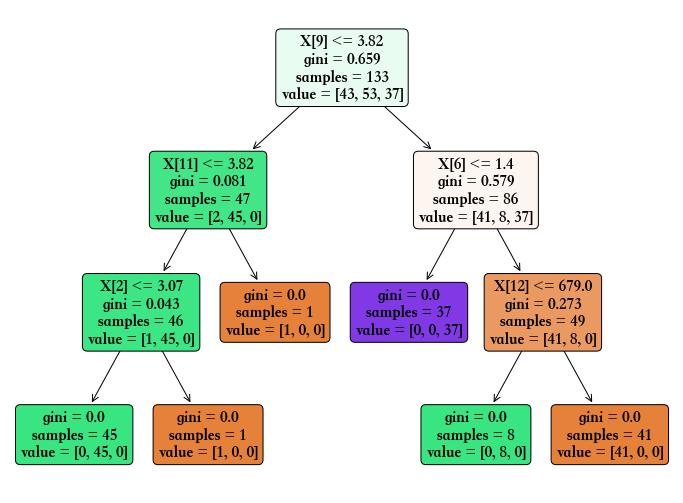

In [30]:
plt.figure(figsize=(12,9))
_ = tree.plot_tree(model,filled=1,rounded=1)